In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import datetime
# from pandas import datetime
from matplotlib.pylab import rcParams
from pandas.tools.plotting import autocorrelation_plot
fig=plt.figure(figsize=(20, 20), dpi= 100, facecolor='w', edgecolor='k')
# rcParams['figure.figsize'] = 50, 20
f = pd.read_csv('amzn.csv')

<Figure size 2000x2000 with 0 Axes>

date
2018-02-01    1445.00
2018-02-02    1477.39
2018-02-05    1402.62
2018-02-06    1361.46
2018-02-07    1449.00
2018-02-08    1429.67
2018-02-09    1373.49
2018-02-12    1364.67
2018-02-13    1385.93
2018-02-14    1406.25
2018-02-15    1466.89
2018-02-16    1457.37
2018-02-20    1446.49
2018-02-21    1485.00
2018-02-22    1495.36
2018-02-23    1495.34
2018-02-26    1509.20
2018-02-27    1524.50
2018-02-28    1519.51
2018-03-01    1513.60
2018-03-02    1469.10
2018-03-05    1494.24
2018-03-06    1533.20
2018-03-07    1526.52
2018-03-08    1550.00
2018-03-09    1563.50
2018-03-12    1592.60
2018-03-13    1615.96
2018-03-14    1597.00
2018-03-15    1595.00
               ...   
2018-12-18    1540.00
2018-12-19    1543.05
2018-12-20    1484.00
2018-12-21    1464.99
2018-12-24    1346.00
2018-12-26    1368.89
2018-12-27    1454.20
2018-12-28    1473.35
2018-12-31    1510.80
2019-01-02    1465.20
2019-01-03    1520.01
2019-01-04    1530.00
2019-01-07    1602.31
2019-01-08    1664.69
2019-

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


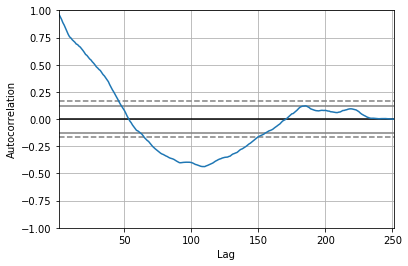

In [5]:
from matplotlib import pyplot
date_before = datetime.date(2014,1,31)
df = f[f['date'] > '2018-01-31'].reset_index(drop = True)
df['date'] = pd.to_datetime(df['date'])
# df.drop(['Date'],axis = 1)
df.set_index('date', inplace=True)
df_open = df['open']
print(df_open)
autocorrelation_plot(df_open)
pyplot.show()

In [6]:
# from matplotlib import pyplot
# fig=pyplot.figure(figsize=(70, 70), dpi= 100, facecolor='w', edgecolor='k')
# df1 = df.drop(['volume'], axis = 1)
# df1.plot()
# df2 = df.drop(['open', 'close', 'high', 'low'], axis =1)
# df2.plot()
# pyplot.show()


In [7]:
# print(df1,df2)

In [8]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_open, order=(25,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.open   No. Observations:                  250
Model:                ARIMA(25, 1, 0)   Log Likelihood               -1259.977
Method:                       css-mle   S.D. of innovations             37.202
Date:                Sun, 03 Feb 2019   AIC                           2573.954
Time:                        15:45:41   BIC                           2669.034
Sample:                             1   HQIC                          2612.221
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1520      1.846      0.624      0.533      -2.467       4.770
ar.L1.D.open     -0.0781      0.064     -1.227      0.221      -0.203       0.047
ar.L2.D.open     -0.0218      0.064     

<Figure size 4000x4000 with 0 Axes>

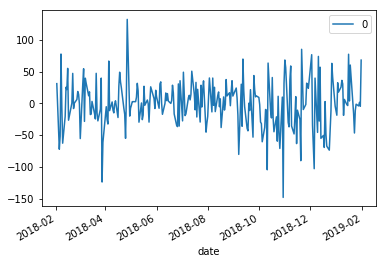

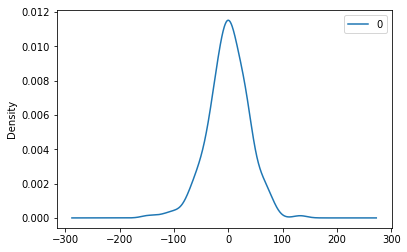

                0
count  250.000000
mean    -0.141034
std     37.486050
min   -147.888298
25%    -20.855233
50%      0.513378
75%     24.207967
max    132.393234


In [11]:
fig=plt.figure(figsize=(40, 40), dpi= 100, facecolor='w', edgecolor='k')
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())